# INFO 498 Final Project

### Train data statistics

In [1]:
# load dataset
import pandas as pd

df_train = pd.read_csv('data/yelpnlg-train.csv')

display(df_train.head())

,id,ref,mr,sentiment,length,first_person,exclamation
0,0,best corn beef and pastrami combo sandwich and...,food||corn_beef||amazing||mention_1 food||past...,positive,len_medium,not_first_person,has_exclamation
1,1,"""he said it did not taste good , and it appear...",food||tomato||canned||mention_1 food||onion||n...,negative,len_long,not_first_person,no_exclamation
2,2,i usually get the dal gal bee chicken dish tha...,food||dal_gal_bee_chicken_dish||no_adj||mentio...,neutral,len_medium,first_person,no_exclamation
3,3,"""the pho was very flavourful , good firm rice ...",food||pho||flavourful||mention_1 food||firm_ri...,positive,len_long,not_first_person,no_exclamation
4,4,"""the spices they use to fry their chicken are ...",food||spices||no_adj||mention_1 food||fry||no_...,positive,len_long,not_first_person,no_exclamation


#### Columns Described

* id - A sequential identifier of the instance in that split.
* ref - The reference text (review sentence) for that instance.
* mr - The meaning representation (mr) for that instance. Each MR is a set of space-separated tuples, and each is tuple
is divided with "||" separators. Each tuple contains the following information (in this order):
    * attribute - one of: {"restaurant", "cuisine", "food", "service", "staff", "ambiance", "price"}
    * value - any value (from attribute lexicons)
    * adjective - any adjective (from sentence dependency parse), else "no_adj" if none is available/retrievable in the parse
    * mention - mention_N (N indicates which mention is being referenced, i.e. 1 for first mention, 2 for second mention, etc.)
* sentiment - "positive" (4-5 stars), "neutral" (3 stars), "negative" (1-2 stars)
* length - "len_short" (4-10 tokens), "len_medium" (10-20 tokens), "len_long" (20-30 tokens)
* first_person - "first_person" (includes a first person pronoun: {"i", "my", "me", "our", "we", "us"}), "not_first_person" (does not include any first person pronouns)
* exclamation - "has_exclamation" (include an exclamation mark), "no_exclamation" (does not include an exclamation mark)

In [2]:
# total reviews
total_reviews = len(df_train)

# total amount of each sentiment
sentiments = {'positive': 0, 'negative': 0, 'neutral': 0}

for sentiment in df_train['sentiment']:
    # check for positive
    if sentiment == 'positive':
        sentiments[sentiment] += 1
    # check for negative
    elif sentiment == 'negative':
        sentiments[sentiment] += 1
    # check for neutral
    elif sentiment == 'neutral':
        sentiments[sentiment] += 1

# total amount of each length of review
total_lengths = {'short': 0, 'medium': 0, 'long': 0}

for length in df_train['length']:
    # check for short
    if length == 'len_short':
        total_lengths['short'] += 1
    # check for medium
    if length == 'len_medium':
        total_lengths['medium'] += 1
    # check for long
    if length == 'len_long':
        total_lengths['long'] += 1

# longest and shortest review
shortest = float('inf')
longest = 0

for review in df_train['ref']:
    review_len = len(review)
    # find shortest
    if review_len < shortest:
        shortest = review_len
    # find longest
    if review_len > longest:
        longest = review_len

# first person/non first person totals
pov_totals = {'first person': 0, 'not first person': 0}

for pov in df_train['first_person']:
    # check for first
    if pov == 'first_person':
        pov_totals['first person'] += 1
    # check for non first
    if pov == 'not_first_person':
        pov_totals['not first person'] += 1

# exclamation vs no exclamation
exclamation_totals = {'exclamation': 0, 'no exclamation': 0}

for exclamation in df_train['exclamation']:
    # check for exclamation
    if exclamation == 'has_exclamation':
        exclamation_totals['exclamation'] += 1
    # check for no exclamation
    if exclamation == 'no_exclamation':
        exclamation_totals['no exclamation'] += 1

# print review total
print('total reviews:', total_reviews)
print()

# print sentiment totals
print('total sentiments:', sentiments)
print()

# print review lengths
print('total lengths:', total_lengths)
print('shortest review by tokens:', shortest)
print('longest review by tokens:', longest)
print()

# print pov totals
print("total pov's:", pov_totals)
print()

# print exclamation totals
print('total exclamations:', exclamation_totals)

total reviews: 235426

total sentiments: {'positive': 146760, 'negative': 48372, 'neutral': 40294}

total lengths: {'short': 22054, 'medium': 116972, 'long': 96400}
shortest review by tokens: 15
longest review by tokens: 245

total pov's: {'first person': 118552, 'not first person': 116874}

total exclamations: {'exclamation': 19244, 'no exclamation': 216181}


## Yelp Business and Reviews
### Cleaning and combining datasets

In [3]:
# load business and review datasets
df_yelp_business = pd.read_csv('data/yelp_business.csv')
df_yelp_review = pd.read_csv('data/yelp_review.csv')

In [4]:
# remove businesses that do not classify as a restaurant
df_yelp_business = df_yelp_business[df_yelp_business['categories'].str.contains('restaurant', case=False, na=False)]

In [5]:
df_yelp_business.head(3)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants
10,XOSRcvtaKc_Q5H1SAzN20A,"""East Coast Coffee""",NaN,"""737 West Pike St""",Houston,PA,15342,40.241548,-80.212815,4.5,3,0,Breakfast & Brunch;Gluten-Free;Coffee & Tea;Fo...


In [6]:
df_yelp_business.shape

(54630, 13)

In [7]:
df_yelp_review.head(3)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0


In [8]:
df_yelp_review.shape

(5261668, 9)

In [9]:
# combine datasets based on the business_id
df_combined = pd.merge(df_yelp_review, df_yelp_business, on='business_id', how='inner')
df_combined.head(3)

,review_id,user_id,business_id,stars_x,date,text,useful,funny,cool,name,...,address,city,state,postal_code,latitude,longitude,stars_y,review_count,is_open,categories
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,"""Wilensky's""",...,"""34 Avenue Fairmount Ouest""",Montréal,QC,H2T 2M1,45.523333,-73.594859,4.0,84,1,Diners;Food;Restaurants;Delis
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,"""Tuck Shop""",...,"""4662 Rue Notre-Dame O""",Montréal,QC,H4C 1S7,45.472902,-73.588321,4.5,50,1,Restaurants;Canadian (New);Italian
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0,"""Lester's Deli""",...,"""1057 Avenue Bernard""",Outremont,QC,H2V 1V1,45.522144,-73.607076,4.0,70,1,Specialty Food;Food;Sandwiches;Restaurants;Bur...


In [10]:
df_combined.shape

(3221555, 21)

In [11]:
# remove unnecessary columns

columns_to_remove = ['user_id', 'useful', 'funny', 'cool', 'address', 'is_open', 'neighborhood']
df_cleaned = df_combined.drop(columns=columns_to_remove)
df_cleaned.head(3)

,review_id,business_id,stars_x,date,text,name,city,state,postal_code,latitude,longitude,stars_y,review_count,categories
0,vkVSCC7xljjrAI4UGfnKEQ,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,"""Wilensky's""",Montréal,QC,H2T 2M1,45.523333,-73.594859,4.0,84,Diners;Food;Restaurants;Delis
1,n6QzIUObkYshz4dz2QRJTw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,"""Tuck Shop""",Montréal,QC,H4C 1S7,45.472902,-73.588321,4.5,50,Restaurants;Canadian (New);Italian
2,MV3CcKScW05u5LVfF6ok0g,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,"""Lester's Deli""",Outremont,QC,H2V 1V1,45.522144,-73.607076,4.0,70,Specialty Food;Food;Sandwiches;Restaurants;Bur...


In [12]:
# randomly sample data to reduce size

sample_fraction = 0.01
df_sampled = df_cleaned.sample(frac=sample_fraction, random_state=1)

# should be over 30,000 samples
df_sampled.shape

(32216, 14)

In [13]:
# map star ratings to sentiment labels
def map_stars_to_sentiment(stars):
    if stars >= 3:
        return 1
    elif stars < 3:
        return 0

# create a new column for true sentiment
df_sampled['true_sentiment'] = df_sampled['stars_x'].apply(map_stars_to_sentiment)


df_sampled.head(5)

,review_id,business_id,stars_x,date,text,name,city,state,postal_code,latitude,longitude,stars_y,review_count,categories,true_sentiment
1947193,UdbSqUb_Eadz6bsH3V8-Ig,LFs5jyYdXlzi0SpAYi1eSA,5,2016-01-12,Came her for my birthday and everything was am...,"""Maggiano's Little Italy""",Las Vegas,NV,89109,36.127783,-115.168968,4.0,1250,Nightlife;Bars;Italian;Restaurants,1
1348323,e8rGhwPielvSOTWEs1idsw,uoEV1AxIm3_XFxiScYWrbA,1,2015-01-31,I will refuse to come to this location again b...,"""Paradise Bakery & Cafe""",Glendale,AZ,85308,33.642095,-112.225680,3.5,12,Cafes;Restaurants;Bakeries;Food,0
2390913,5CsGTuMbnVvFTY55QhZa0A,vF58mwG-9Bx67S6hxKZ68A,3,2010-01-20,I have never actually had a good time at this ...,"""Frank & Tony's""",Willoughby,OH,44094,41.640863,-81.407730,2.5,19,Nightlife;Bars;Pizza;Restaurants,1
1151566,TBdeYFPPqVw19hRjxOQXuA,igHYkXZMLAc9UdV5VnR_AA,5,2016-05-05,We had dinner here this week after being entic...,"""Echo & Rig""",Las Vegas,NV,89145,36.166576,-115.286232,4.5,1924,Food;Steakhouses;Meat Shops;Butcher;Specialty ...,1
2361052,091Ga8_V_ngvhl8Z89wleg,EdIFp1tdPi1267hm3da6Nw,4,2017-11-09,Got the prime rib here on my last vegas trip i...,"""Ellis Island BBQ""",Las Vegas,NV,89109,36.113207,-115.163313,4.0,97,Restaurants;American (Traditional);Barbeque,1


# Text Classification with LLM prompting

### OpenAI API

In [14]:
import os
from openai import OpenAI

def complete(prompt):
    client = OpenAI()
    
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {
                "role": "user",
                "content": prompt
            }
        ]
    )
    
    return completion.choices[0].message.content

In [15]:
ZERO_PROMPT = """
Please classify the following review as positive or negative.
Output 1 for positive and 0 for negative.
Format the output as Label: 0 or 1.

Review: "{}"
"""

FEW_PROMPT = """
Please classify the following review as positive or negative.
Output 1 for positive and 0 for negative.
Format the output as Label: 0 or 1.

For example:
Review: “I had a great experience at this restaurant!
The food was delicious, and the service was excellent.
I will be back soon!” 
Label: 1

Review: "This place is amazing! We are having the Doria and it is sensational!
I would recommend this restaurant 11 times out of 10 and the service is efficient
and friendly! First time in Seattle, best place we have been to so far!
Also fair prices and the cream soda come with ice cream and is delicious!!!"
Label: 1

Review: "I had high hopes for this place, but everything was a letdown. 
The food was greasy and lacked flavor, the portions were small for the price, 
and the staff seemed annoyed to even be there. I had to ask twice for water,
and it never came. Definitely won't be returning."
Label: 0

Reviews: "bad service and food not good enough to make up for it.
server acted annoyed with us the entire time and food LOOKED amazing 
but that's where that ended. wasn't horrible but nothing mind blowing.
not worth the price. skip this one:
Label: 0

Review: "{}"
"""


In [16]:
# LLM prompting for few shot
outputs_few = dict()

for i in range(len(df_sampled) // 10):
    prompt = FEW_PROMPT.format(df_sampled['text'].iloc[i])
    response = complete(prompt)
    outputs_few[i] = response

In [17]:
# LLM prompting for zero shot
outputs_zero = dict()

for i in range(len(df_sampled) // 10):
    prompt = ZERO_PROMPT.format(df_sampled['text'].iloc[i])
    response = complete(prompt)
    outputs_zero[i] = response

In [18]:
from sklearn.metrics import classification_report

predictions_few = [int(response.strip("Label: ")) for response in outputs_few.values()]
predictions_zero = [int(response.strip("Label: ")) for response in outputs_zero.values()]

In [25]:
# store predictions in DF
subset_len = len(predictions_few)
subset = df_sampled.iloc[:subset_len]

subset['few_shot_predicted'] = predictions_few
subset['zero_shot_predicted'] = predictions_zero

/var/folders/_h/kj12bp453k30xgvrnbblr_p80000gn/T/ipykernel_87077/2488231135.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['few_shot_predicted'] = predictions_few
/var/folders/_h/kj12bp453k30xgvrnbblr_p80000gn/T/ipykernel_87077/2488231135.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['zero_shot_predicted'] = predictions_zero


In [26]:
subset.head(5)


,review_id,business_id,stars_x,date,text,name,city,state,postal_code,latitude,longitude,stars_y,review_count,categories,true_sentiment,few_shot_predicted,zero_shot_predicted
1947193,UdbSqUb_Eadz6bsH3V8-Ig,LFs5jyYdXlzi0SpAYi1eSA,5,2016-01-12,Came her for my birthday and everything was am...,"""Maggiano's Little Italy""",Las Vegas,NV,89109,36.127783,-115.168968,4.0,1250,Nightlife;Bars;Italian;Restaurants,1,1,1
1348323,e8rGhwPielvSOTWEs1idsw,uoEV1AxIm3_XFxiScYWrbA,1,2015-01-31,I will refuse to come to this location again b...,"""Paradise Bakery & Cafe""",Glendale,AZ,85308,33.642095,-112.225680,3.5,12,Cafes;Restaurants;Bakeries;Food,0,0,0
2390913,5CsGTuMbnVvFTY55QhZa0A,vF58mwG-9Bx67S6hxKZ68A,3,2010-01-20,I have never actually had a good time at this ...,"""Frank & Tony's""",Willoughby,OH,44094,41.640863,-81.407730,2.5,19,Nightlife;Bars;Pizza;Restaurants,1,1,1
1151566,TBdeYFPPqVw19hRjxOQXuA,igHYkXZMLAc9UdV5VnR_AA,5,2016-05-05,We had dinner here this week after being entic...,"""Echo & Rig""",Las Vegas,NV,89145,36.166576,-115.286232,4.5,1924,Food;Steakhouses;Meat Shops;Butcher;Specialty ...,1,1,1
2361052,091Ga8_V_ngvhl8Z89wleg,EdIFp1tdPi1267hm3da6Nw,4,2017-11-09,Got the prime rib here on my last vegas trip i...,"""Ellis Island BBQ""",Las Vegas,NV,89109,36.113207,-115.163313,4.0,97,Restaurants;American (Traditional);Barbeque,1,1,1


In [29]:
# few shot llm stats
print('Few shot classification report:')
print(classification_report(subset['true_sentiment'], subset['few_shot_predicted']))
print()

# zero shot llm stats
print('Zero shot classification report:')
print(classification_report(subset['true_sentiment'], subset['zero_shot_predicted']))

Few shot classification report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.80       650
           1       1.00      0.87      0.93      2571

    accuracy                           0.90      3221
   macro avg       0.83      0.93      0.86      3221
weighted avg       0.93      0.90      0.90      3221


Zero shot classification report:
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       650
           1       1.00      0.88      0.93      2571

    accuracy                           0.90      3221
   macro avg       0.83      0.93      0.87      3221
weighted avg       0.93      0.90      0.91      3221



Confusion Matrix:
 [[2240  331]
 [   2  648]]


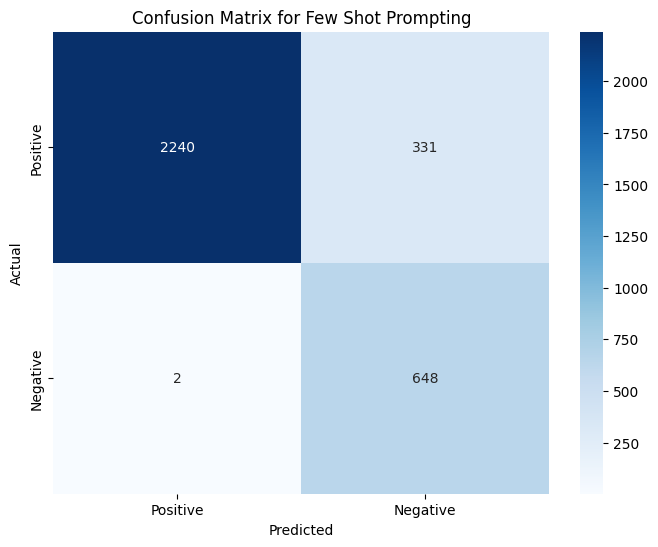

Confusion Matrix:
 [[2255  316]
 [   7  643]]


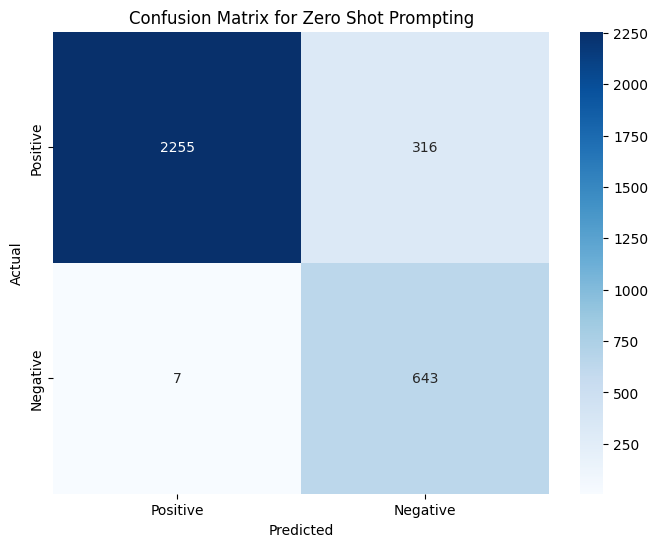

In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# calculate confusion matrix for few shot
cm = confusion_matrix(subset['true_sentiment'], subset['few_shot_predicted'], labels=[1, 0])
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Few Shot Prompting')
plt.show()

# calculate confusion matrix for zero shot
cm = confusion_matrix(subset['true_sentiment'], subset['zero_shot_predicted'], labels=[1, 0])
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Zero Shot Prompting')
plt.show()

## Review Sentiments Across Different Locations (by City, LLM prompting)

In [36]:
subset['city'] = subset['city'].str.lower().str.strip()

/var/folders/_h/kj12bp453k30xgvrnbblr_p80000gn/T/ipykernel_87077/1979640056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['city'] = subset['city'].str.lower().str.strip()


In [37]:
subset.head(3)

,review_id,business_id,stars_x,date,text,name,city,state,postal_code,latitude,longitude,stars_y,review_count,categories,true_sentiment,few_shot_predicted,zero_shot_predicted
1947193,UdbSqUb_Eadz6bsH3V8-Ig,LFs5jyYdXlzi0SpAYi1eSA,5,2016-01-12,Came her for my birthday and everything was am...,"""Maggiano's Little Italy""",las vegas,NV,89109,36.127783,-115.168968,4.0,1250,Nightlife;Bars;Italian;Restaurants,1,1,1
1348323,e8rGhwPielvSOTWEs1idsw,uoEV1AxIm3_XFxiScYWrbA,1,2015-01-31,I will refuse to come to this location again b...,"""Paradise Bakery & Cafe""",glendale,AZ,85308,33.642095,-112.225680,3.5,12,Cafes;Restaurants;Bakeries;Food,0,0,0
2390913,5CsGTuMbnVvFTY55QhZa0A,vF58mwG-9Bx67S6hxKZ68A,3,2010-01-20,I have never actually had a good time at this ...,"""Frank & Tony's""",willoughby,OH,44094,41.640863,-81.407730,2.5,19,Nightlife;Bars;Pizza;Restaurants,1,1,1


In [39]:
# average star rating and predicted sentiment per city for few shot prompting
location_metrics_fewshot = subset.groupby('city').agg(
    Avg_Rating=('stars_x', 'mean'),  # Calculate mean star rating
    Positive_Count=('few_shot_predicted', lambda x: (x == 1).sum()),
    Negative_Count=('few_shot_predicted', lambda x: (x == 0).sum())
).reset_index()

location_metrics_fewshot['Total_Reviews'] = location_metrics_fewshot['Positive_Count'] + location_metrics_fewshot['Negative_Count']
location_metrics_fewshot['Positive_Percentage'] = (location_metrics_fewshot['Positive_Count'] / location_metrics_fewshot['Total_Reviews']) * 100
location_metrics_fewshot['Negative_Percentage'] = (location_metrics_fewshot['Negative_Count'] / location_metrics_fewshot['Total_Reviews']) * 100

location_metrics_fewshot

,city,Avg_Rating,Positive_Count,Negative_Count,Total_Reviews,Positive_Percentage,Negative_Percentage
0,ajax,5.000000,1,0,1,100.0,0.0
1,ambridge,5.000000,2,0,2,100.0,0.0
2,amherst,4.000000,1,0,1,100.0,0.0
3,anjou,2.000000,0,1,1,0.0,100.0
4,anthem,5.000000,1,0,1,100.0,0.0
...,...,...,...,...,...,...,...
157,whitby,3.000000,2,0,2,100.0,0.0
158,willoughby,4.500000,4,0,4,100.0,0.0
159,woodbridge,4.500000,2,0,2,100.0,0.0
160,woodmere,4.333333,3,0,3,100.0,0.0


In [40]:
# average star rating and predicted sentiment per city for zero shot prompting
location_metrics_zeroshot = subset.groupby('city').agg(
    Avg_Rating=('stars_x', 'mean'),  # Calculate mean star rating
    Positive_Count=('zero_shot_predicted', lambda x: (x == 1).sum()),
    Negative_Count=('zero_shot_predicted', lambda x: (x == 0).sum())
).reset_index()

location_metrics_zeroshot['Total_Reviews'] = location_metrics_zeroshot['Positive_Count'] + location_metrics_zeroshot['Negative_Count']
location_metrics_zeroshot['Positive_Percentage'] = (location_metrics_zeroshot['Positive_Count'] / location_metrics_zeroshot['Total_Reviews']) * 100
location_metrics_zeroshot['Negative_Percentage'] = (location_metrics_zeroshot['Negative_Count'] / location_metrics_zeroshot['Total_Reviews']) * 100

location_metrics_zeroshot

,city,Avg_Rating,Positive_Count,Negative_Count,Total_Reviews,Positive_Percentage,Negative_Percentage
0,ajax,5.000000,1,0,1,100.0,0.0
1,ambridge,5.000000,2,0,2,100.0,0.0
2,amherst,4.000000,1,0,1,100.0,0.0
3,anjou,2.000000,0,1,1,0.0,100.0
4,anthem,5.000000,1,0,1,100.0,0.0
...,...,...,...,...,...,...,...
157,whitby,3.000000,2,0,2,100.0,0.0
158,willoughby,4.500000,4,0,4,100.0,0.0
159,woodbridge,4.500000,2,0,2,100.0,0.0
160,woodmere,4.333333,3,0,3,100.0,0.0


In [43]:
# top 20 cities with their respective metrics by prompting type

top_20_cities_fewshot = location_metrics_fewshot.sort_values(by='Total_Reviews', ascending=False).head(20)
top_20_cities_fewshot

,city,Avg_Rating,Positive_Count,Negative_Count,Total_Reviews,Positive_Percentage,Negative_Percentage
65,las vegas,3.826464,662,260,922,71.800434,28.199566
111,phoenix,3.876543,233,91,324,71.913580,28.086420
143,toronto,3.602694,205,92,297,69.023569,30.976431
125,scottsdale,3.673797,122,65,187,65.240642,34.759358
29,charlotte,3.537975,107,51,158,67.721519,32.278481
114,pittsburgh,3.813008,90,33,123,73.170732,26.829268
140,tempe,3.485437,60,43,103,58.252427,41.747573
90,montréal,3.715909,59,29,88,67.045455,32.954545
54,henderson,4.135135,60,14,74,81.081081,18.918919
83,mesa,3.628571,49,21,70,70.000000,30.000000


In [44]:
top_20_cities_zeroshot = location_metrics_zeroshot.sort_values(by='Total_Reviews', ascending=False).head(20)
top_20_cities_zeroshot

,city,Avg_Rating,Positive_Count,Negative_Count,Total_Reviews,Positive_Percentage,Negative_Percentage
65,las vegas,3.826464,664,258,922,72.017354,27.982646
111,phoenix,3.876543,235,89,324,72.530864,27.469136
143,toronto,3.602694,207,90,297,69.696970,30.303030
125,scottsdale,3.673797,124,63,187,66.310160,33.689840
29,charlotte,3.537975,108,50,158,68.354430,31.645570
114,pittsburgh,3.813008,91,32,123,73.983740,26.016260
140,tempe,3.485437,58,45,103,56.310680,43.689320
90,montréal,3.715909,60,28,88,68.181818,31.818182
54,henderson,4.135135,60,14,74,81.081081,18.918919
83,mesa,3.628571,48,22,70,68.571429,31.428571


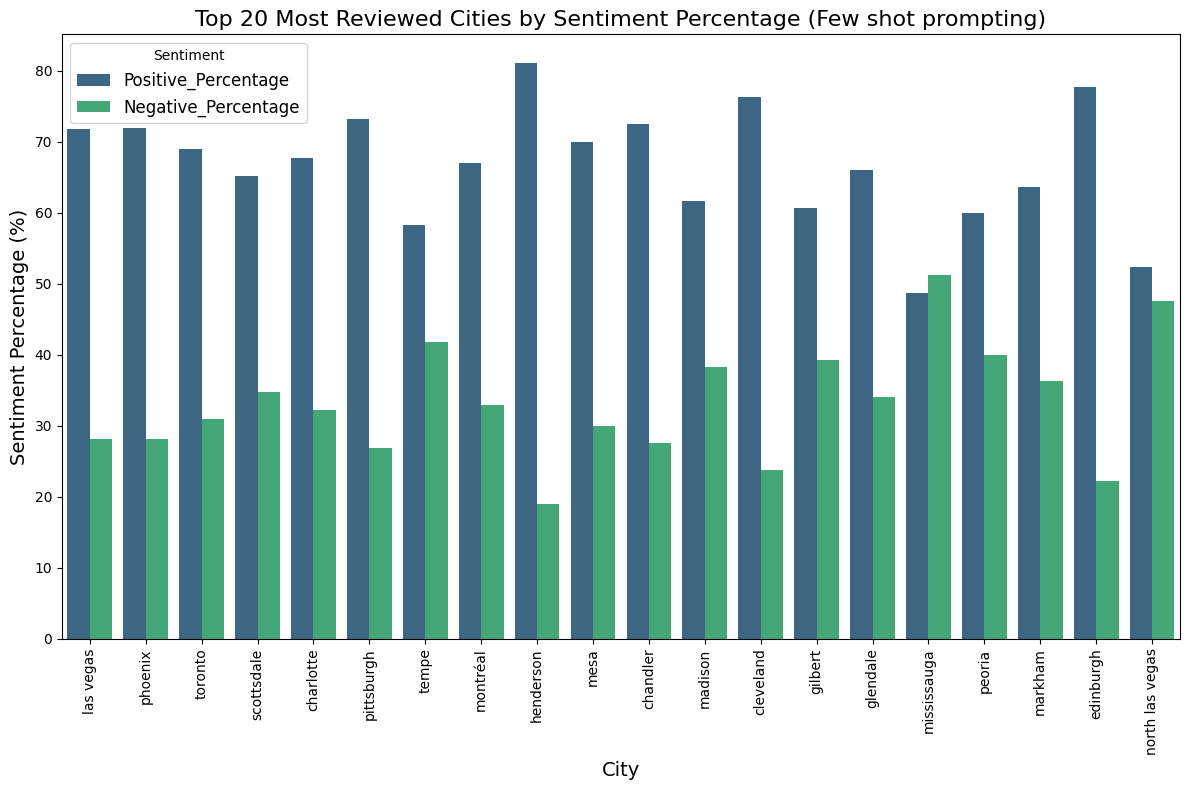

In [46]:
# graph for few shot
melted_data_fewshot = top_20_cities_fewshot.melt(id_vars='city', 
                                 value_vars=['Positive_Percentage', 'Negative_Percentage'], 
                                 var_name='Sentiment', 
                                 value_name='Percentage')

plt.figure(figsize=(12, 8))
sns.barplot(data=melted_data_fewshot, x='city', y='Percentage', hue='Sentiment', palette='viridis')

plt.title('Top 20 Most Reviewed Cities by Sentiment Percentage (Few shot prompting)', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Sentiment Percentage (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.legend(title='Sentiment', fontsize=12)
plt.tight_layout()

plt.show()

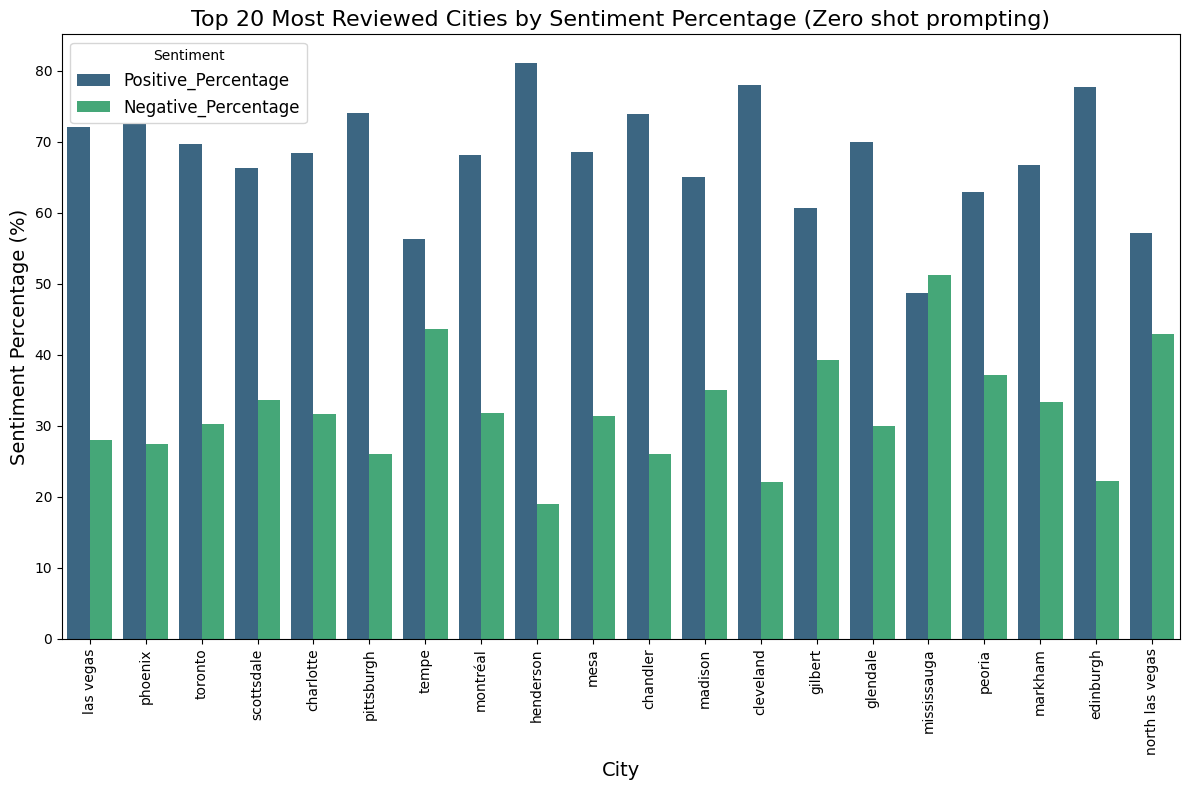

In [47]:
# graph for zero shot
melted_data_zeroshot = top_20_cities_zeroshot.melt(id_vars='city', 
                                 value_vars=['Positive_Percentage', 'Negative_Percentage'], 
                                 var_name='Sentiment', 
                                 value_name='Percentage')

plt.figure(figsize=(12, 8))
sns.barplot(data=melted_data_zeroshot, x='city', y='Percentage', hue='Sentiment', palette='viridis')

plt.title('Top 20 Most Reviewed Cities by Sentiment Percentage (Zero shot prompting)', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Sentiment Percentage (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.legend(title='Sentiment', fontsize=12)
plt.tight_layout()

plt.show()

/var/folders/_h/kj12bp453k30xgvrnbblr_p80000gn/T/ipykernel_87077/3423971623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['date'] = pd.to_datetime(df_sampled['date'])
/var/folders/_h/kj12bp453k30xgvrnbblr_p80000gn/T/ipykernel_87077/3423971623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['year'] = subset['date'].dt.year


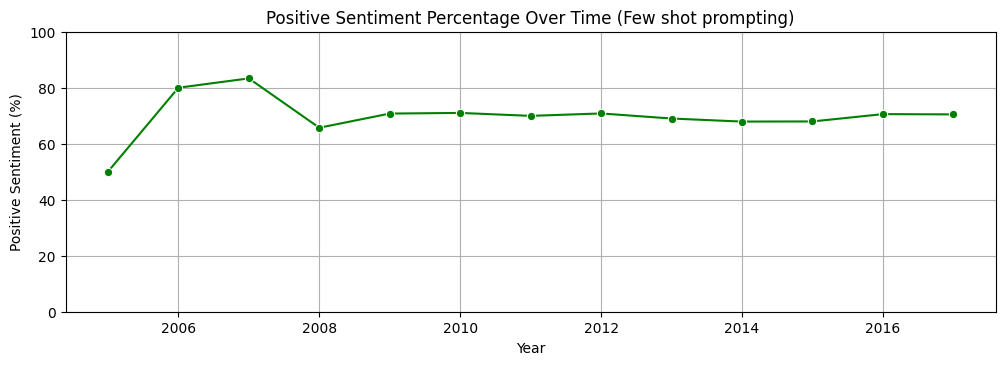

In [49]:
# sentiments over time for few shot
subset['date'] = pd.to_datetime(df_sampled['date'])
subset['year'] = subset['date'].dt.year

time_trends = subset.groupby('year').agg(
    Avg_Rating=('stars_x', 'mean'),
    Positive_Percentage=('few_shot_predicted', lambda x: (x == 1).sum() / len(x) * 100)
).reset_index()

# positive sentiment percentage
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 2)
sns.lineplot(data=time_trends, x='year', y='Positive_Percentage', marker='o', color='green')
plt.title('Positive Sentiment Percentage Over Time (Few shot prompting)')
plt.xlabel('Year')
plt.ylabel('Positive Sentiment (%)')
plt.ylim(0, 100)
plt.grid(True)

plt.show()

/var/folders/_h/kj12bp453k30xgvrnbblr_p80000gn/T/ipykernel_87077/1889370911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['date'] = pd.to_datetime(df_sampled['date'])
/var/folders/_h/kj12bp453k30xgvrnbblr_p80000gn/T/ipykernel_87077/1889370911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['year'] = subset['date'].dt.year


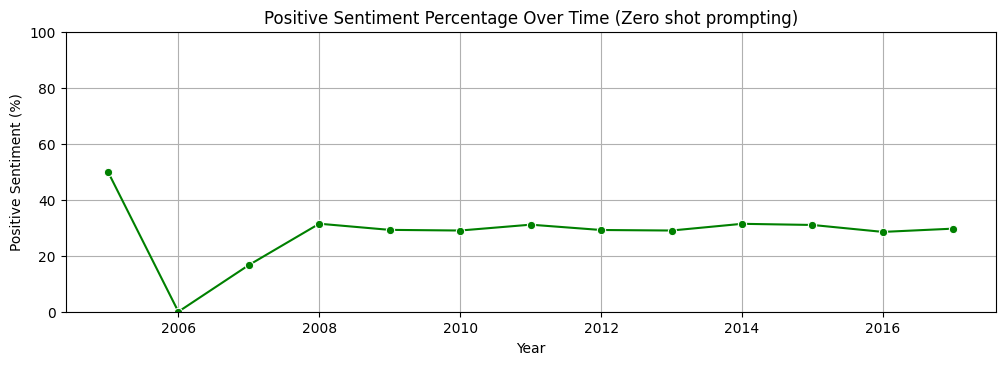

In [50]:
# sentiments over time for zero shot
subset['date'] = pd.to_datetime(df_sampled['date'])
subset['year'] = subset['date'].dt.year

time_trends = subset.groupby('year').agg(
    Avg_Rating=('stars_x', 'mean'),
    Positive_Percentage=('zero_shot_predicted', lambda x: (x == 0).sum() / len(x) * 100)
).reset_index()

# positive sentiment percentage
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 2)
sns.lineplot(data=time_trends, x='year', y='Positive_Percentage', marker='o', color='green')
plt.title('Positive Sentiment Percentage Over Time (Zero shot prompting)')
plt.xlabel('Year')
plt.ylabel('Positive Sentiment (%)')
plt.ylim(0, 100)
plt.grid(True)

plt.show()